# Defining Outliers

We shouldn’t just use synapse data to determine outliers. This is because outliers may be hidden by their unmasking value. 
We know there is a correlation between these two variables of 0.89. We may have to refine our definition of outliers in the future. At this point, we decided that outliers are data points that have a unmasking value greater than the first quartile.


In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import urllib2

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

def check_condition(row):
    if row[4] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
csv = csv[a, :]


Determine unmasked threshold for outliers.

unMaskedThresh: 125237.713292


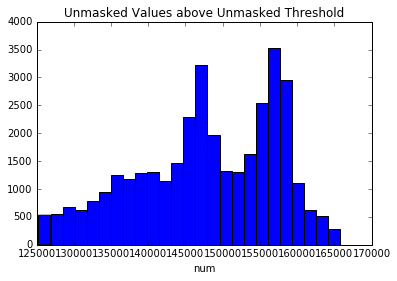

In [7]:
newcsv = csv[:,3]/np.amax(csv[:,3])
newsyn = csv[:,4]/np.amax(csv[:,4])
a = np.divide(csv[:,4],newcsv)
unMaskedThresh = np.mean(csv[:,3]) #+ np.std(csv[:,3])

print "unMaskedThresh: " + str(unMaskedThresh)

def check_condition(row):
    if row[3] < unMaskedThresh:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
csv = csv[a, :]

fig = plt.figure(5)
ax = fig.gca()
plt.hist(csv[:,3],bins=25)
ax.set_title('Unmasked Values above Unmasked Threshold')
ax.set_xlabel('num')


plt.show()